Notebook for data generation, training, and sampling experiments.

In [1]:
import importlib
import sys
from pathlib import Path


def ensure_repo_on_path() -> Path:
    cwd = Path.cwd().resolve()
    for root in [cwd, *cwd.parents]:
        if (root / "pyproject.toml").exists() and (root / "polydiff").is_dir():
            root_str = str(root)
            if root_str not in sys.path:
                sys.path.insert(0, root_str)
            return root
    raise RuntimeError(
        "Could not locate repo root. Start Jupyter from this repo or install with: pip install -e .[dev]"
    )


REPO_ROOT = ensure_repo_on_path()

# If another polydiff package was imported earlier in this kernel, remove it.
mod = sys.modules.get("polydiff")
if mod is not None:
    mod_file = Path(getattr(mod, "__file__", "") or "")
    if not mod_file.exists() or REPO_ROOT not in mod_file.parents:
        del sys.modules["polydiff"]

polydiff = importlib.import_module("polydiff")
print(f"repo root: {REPO_ROOT}")
print(f"polydiff module: {getattr(polydiff, '__file__', 'unknown')}")

repo root: /Users/jeremyzay/Desktop/thayer_lab_research/2026/spring_2026/polydiff
polydiff module: /Users/jeremyzay/Desktop/thayer_lab_research/2026/spring_2026/polydiff/polydiff/__init__.py


In [2]:
from polydiff import gen_polygons, paths

# Data-generation imports should always work once package import is fixed.

In [3]:
# In-memory data generation example
X, score, deform = gen_polygons.batch(n=6, num=128, seed=0)
X.shape, float(score.min()), float(score.max())

((128, 6, 2), 0.4101703464984894, 0.9949819445610046)

In [4]:
# Optional: training/sampling imports (requires torch + pyyaml in kernel env)
try:
    from polydiff.training.train import train_from_config
    from polydiff.sampling.sample import sample_from_config
    print("training/sampling imports: OK")
except ModuleNotFoundError as exc:
    print(f"missing dependency for training/sampling: {exc}")

training/sampling imports: OK


In [ ]:
# Config-driven training / sampling (uncomment to run)
# train_from_config(paths.CONFIG_DIR / "train_diffusion.yaml")
sample_from_config(paths.CONFIG_DIR / "sample_diffusion.yaml")

TypeError: sample_from_config() got an unexpected keyword argument 'show_scores'

In [ ]:
import os
os.getcwd()

'/Users/jeremyzay/Desktop/thayer_lab_research/2026/spring_2026/polydiff/notebooks'

In [12]:
!ls data/processed/

ls: data/processed/: No such file or directory


In [14]:
!ls ..

README.md         notebooks         pyproject.toml    utils
configs           poetry.lock       scripts
data              polydiff          test.ml
models            pretrained_models tests


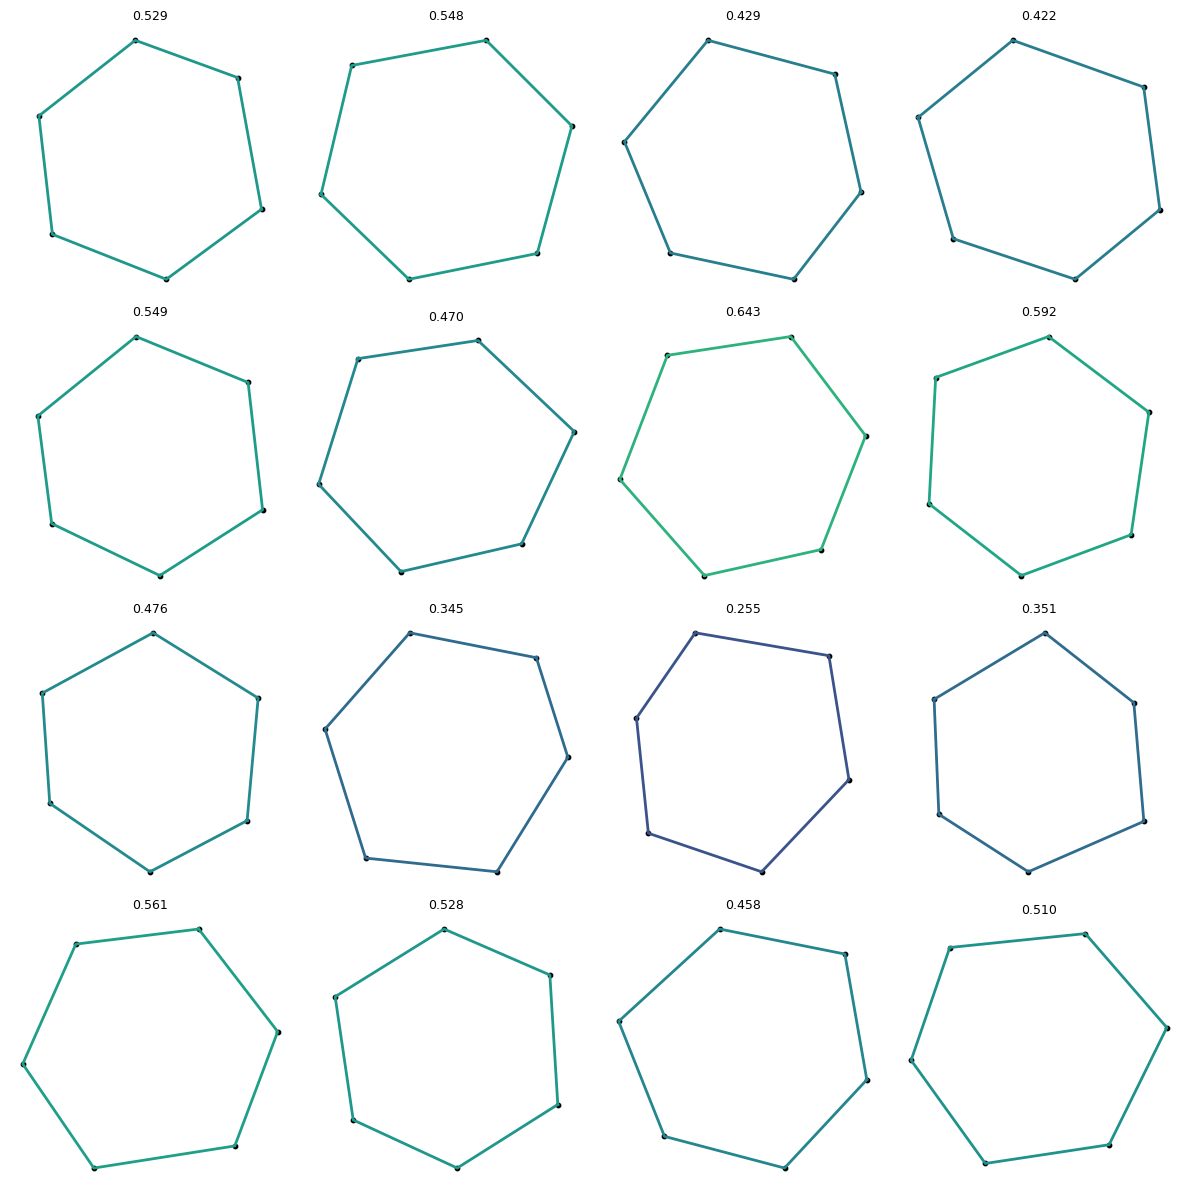

In [15]:
from polydiff.data.plot_polygons import plot_file
import matplotlib.pyplot as plt

fig, _ = plot_file("../data/processed/samples.npz", num=16, compute_score=True, show_scores=True)
plt.show()